In [2]:
import matplotlib.pyplot as plt
from numpy import linalg
from cmath import *
from math import *
import numpy as np

In [3]:
"""
Returns the angular frequency w('omega') given the linear frequency f('freq')
"""
def omega(freq):
    return 2*pi*freq

"""
Returns the phasorial representation of a resistor given it's resistance ('R')
"""
def Z_R(R):
    return R

"""
Returns the phasorial representation of a capacitor given it's capacitance (in F) and the system frequency (both in rad/s or in Hz)
"""
def Z_C(w, C, f_in_Hz=False):
    if f_in_Hz:
        w = omega(w)
    return 1/(1j*w*C)

"""
Returns the phasorial representation of a inductor given it's inductance (in H) and the system frequency (in both rad/s or in Hz)
"""
def Z_L(w, L, f_in_Hz=False):
    if f_in_Hz:
        w = omega(w)
    return 1j*w*L
"""
Returns the polar representation of a phasor given it's cartesian (rectangular) representation
"""
def Z_rect_to_pol(Z):
    return abs(Z), degrees(phase(Z))

"""
Shows a phasorial representation (in both polar and rectangular representations)
"""
def Z_show(Z, polar=True, before_text="", after_text=" "):
    if polar:
        mod, ang = Z_rect_to_pol(Z)
        print(before_text+"{} < {}º".format(mod, ang) + after_text)
    else:
        print(Z)
    
"""
Returns the equivalent reactance given two reactances connected in parallel
"""
def in_parallel(Za, Zb):
    return (Za * Zb) / (Za + Zb)

"""
Returns the equivalent reactance given two reactances connected in series
"""    
def in_series(Za, Zb):
    return Za + Zb

"""L
Returns the current on a specific component given the Ohm's law (I = U / R)
"""
def current(Vt, Zx):
    return Vt / Zx

"""
Returns the voltage on a specific component given the Ohm's law (U = R * I)
"""
def voltage(It, Zx):
    return It*Zx

"""
Returns the currents on a tranformer component given the equivalent impedance of each side of the circuit(Z1, Z2)
"""
def transformer(v1, w, m, z1, z2):
    xm = 1j*w*m
    Z=np.array([[z1, -xm],[-xm, z2]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

"""
Returns the 
"""
def power(Vp, I):
    Vef = Vp/sqrt(2)
    Ief = I/sqrt(2)
    S = Vef*Ief.conjugate()
    return S

"""
Returns the 
"""
def efficiency():
    pass

![Circuit Model](modelo_v1.png "WPT Circuit Model")

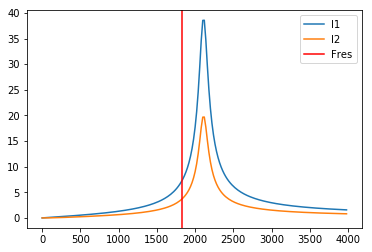

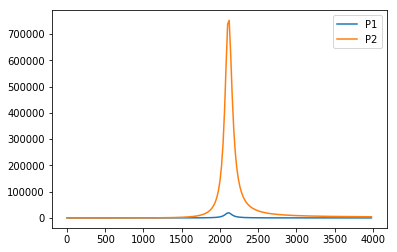

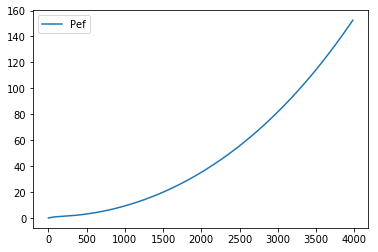

2121
1825.7418583505537


In [9]:
# Natural ressonance frequency:

V = 1e3 # V

# 
lista_k = np.linspace(0,1,100)
lista_w = []
lista_v2 = []
lista_i1 = []
lista_i2 = []
lista_P1 = []
lista_P2 = []
lista_Ef = []

# r1=0.5
# r2=0.5
# l1=300e-3
# l2=300e-3
# f=60
# k=0.5

for w in range(1, 4000, 20):
    lista_w.append(w)
    # Phasorial Representation of all components:
    L = 300e-3
    C = 1e-6
    R = 0.5
    XR1 = Z_R(R)     # Ohm
    XR2 = Z_R(R)     # Ohm
    XL1 = Z_L(w, L)  # Ohm
    XL2 = Z_L(w, L)  # Ohm
    XC1 = Z_C(w, C)  # Ohm
    XC2 = Z_C(w, C)  # Ohm
    XRC = Z_R(100)   # Ohm

    # Association between components (Transformer):
    Zp1 = in_series(XC1, XR1)
    Z1 = in_series(XL1, Zp1)

    Zp2 = in_parallel(XC2, XRC)
    Zp3 = in_series(XR2, XL2)
    Z2 = in_series(Zp2, Zp3)


    k = 0.5
    m = k*sqrt(L*L)
    I1, I2 = transformer(V, w, m, Z1, Z2)
    lista_i1.append(abs(I1))
    lista_i2.append(abs(I2))

    Irc = I2*Z2/XRC

    Pf = power(V, I1).real
    Prc = power(XRC*Irc, Irc).real
    lista_P1.append( Pf )
    lista_P2.append( Prc )

    lista_Ef.append(Prc/Pf)
    


w = 1/sqrt(300e-3*1e-6)

plt.plot(lista_w, lista_i1, label="I1")
plt.plot(lista_w, lista_i2, label="I2")
plt.axvline(w, color='r', linestyle='-', label='Fres')
plt.legend()
plt.show()

plt.plot(lista_w, lista_P1, label="P1")
plt.plot(lista_w, lista_P2, label="P2")
plt.legend()
plt.show()

plt.plot(lista_w, lista_Ef, label="Pef")
plt.legend()
plt.show()
print(lista_w[lista_i1.index(max(lista_i1))])
print (w)



In [27]:
lista_i1

(5.00224178868801e-10+0.0010000002999991937j)

In [35]:
Zeq = 10.61 + 1j*2.41
Vp = 20
I = Vp/Zeq
Z_rect_to_pol(I)

(1.8381902616911876, -12.797263688715953)

In [42]:
Vef = Vp/sqrt(2)
Ief = I/sqrt(2)
S = ( Vef )*Ief.conjugate()
#Z_rect_to_pol(S)
S

(17.925294939525358+4.071626843002462j)